In [9]:
from torch.utils.data import  DataLoader
from LIDC_M_data import LIDC_Dataset
import torch,os
import pandas as pd
# import torchio as tio
import matplotlib.pyplot as plt
import numpy as np
from torchvision.transforms import v2
import torch.nn.functional as F
from torchvision import tv_tensors,utils
from configparser import ConfigParser

In [10]:
prep_tr = [
    v2.Lambda(lambda x: tv_tensors.Image(torch.clamp(x,-1000.,400.)) if isinstance(x, tv_tensors.Image) else x),
    # tio.Clamp(-1000,400),
    v2.Lambda(lambda x: tv_tensors.Image((x+1000)/1400) if isinstance(x, tv_tensors.Image) else x),
    # tio.RescaleIntensity((0,1), in_min_max=(-1000,400)),
    v2.CenterCrop((384,384)),
    # tio.CropOrPad((1,384,384),padding_mode='minimum')
]

aug_tr = [
    v2.RandomAffine(degrees=15),
    v2.RandomHorizontalFlip(),
    # v2.GaussianNoise(0,0.1)
]
trans0 = v2.Compose( prep_tr + aug_tr )
tr_test=v2.Compose(prep_tr)

In [11]:
parser = ConfigParser()
parser.read('.settings')
root_dir = parser.get('dataset','root_dir') #/workspaces/data/lidc-idri/slices
meta_dir = parser.get('dataset','meta_dir') #/workspaces/data/lidc-idri/splits
train_data = LIDC_Dataset(root_dir,metapath=os.path.join(meta_dir,'trainBB_malB.csv'),transform=trans0)
test_data = LIDC_Dataset(root_dir,metapath=os.path.join(meta_dir,'test_malB.csv'),transform=trans0)

total_train_data = len(train_data)
total_test_data = len(test_data)
print('total_train_data:',total_train_data, 'total_test_data:',total_test_data)

total_train_data: 5495 total_test_data: 2354


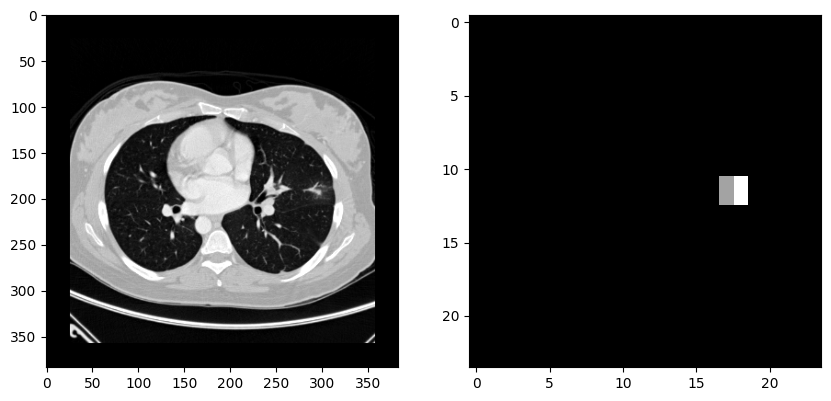

In [16]:
# import matplotlib.patches as patches
train_raw = LIDC_Dataset(root_dir,metapath=os.path.join(meta_dir,'trainBB_malB.csv'))
fig, axes = plt.subplots(1,2,figsize=(10, 5))
train_data0 = train_data[0]
img, mask = train_data0[0], train_data0[2]
axes[0].imshow(img[0], cmap='gray')

mask = F.adaptive_avg_pool2d(mask, (24,24))
axes[1].imshow(mask[0], cmap='gray')

In [6]:
pd.Series(mask.flatten()).describe()
# mask.shape

count    576.000000
mean       0.001872
std        0.023159
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        0.382812
dtype: float64

In [19]:
v2.Compose([v2.CenterCrop((384,384))])(train_raw[0][2]).shape

torch.Size([1, 384, 384])